# $\chi^2$ minimisation

Given the functional form:

$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

The advantage of this method is that you can include the uncertainties in $y_i$.

# Example

In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

filename = 'data.csv'

data_3 = pd.read_csv('data_pendulum_new.csv')

#print(data_3)
length = data_3['Length(m)']
p_mean = data_3["PeriodMean(s)"]
p_stde = data_3["PeriodStd(s)"]


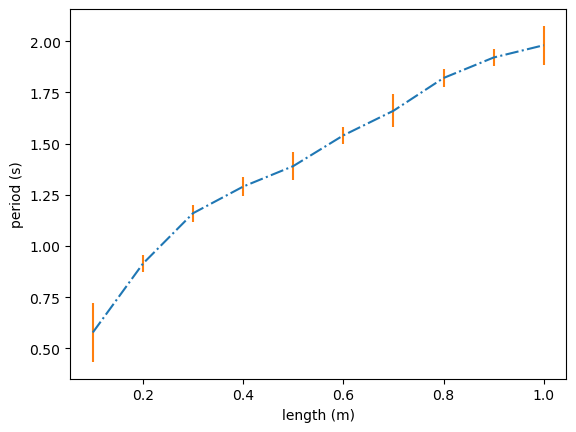

In [2]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(length, p_mean, linestyle="-.", label="Free fall experiment")
ax.errorbar(length, p_mean, yerr = 3*p_stde, linestyle='')
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()

In [3]:
# Define X^2 function

def chisqfunc(b):
    model = b*np.sqrt(length)
    chisq = np.sum(((p_mean - model) / p_stde)**2)
    return chisq

We can use opt.minimize from the scipy package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


This function minimises a scalar function of one or more variables.


The optimization result is represented as a OptimizeResult object with attributes:


- **x** the solution array
- **success** a Boolean flag indicating if the optimizer exited successfully
- **a message** which describes the cause of the termination.


In [11]:
p_mean = p_mean
p_stde = p_stde

x0 = np.array((0))

#print(x0)

# Minimise the function.
result =  opt.minimize(chisqfunc, x0)
              
#print(result)
#print(result.x)

assert result.success==True

a = result.x

print(a)
#%matplotlib inline
#plt.plot(length, p_mean, marker='d', linestyle='')
#plt.plot(length, a*np.sqrt(length))

[2.02239971]


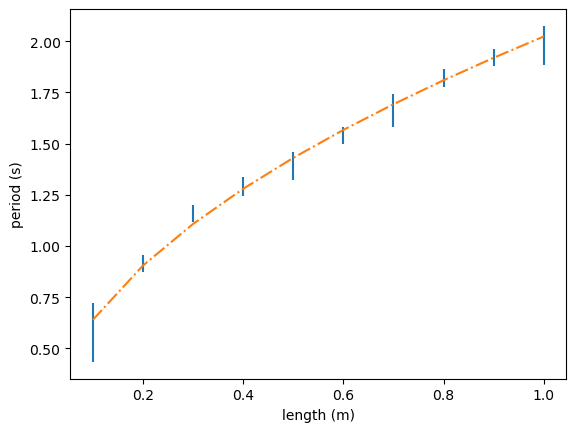

In [5]:
# And now we plot
fig, ax = plt.subplots()

ax.errorbar(length, p_mean, yerr = 3*p_stde, linestyle='')
ax.plot(length, a*np.sqrt(length), linestyle="-.", label="fit")
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()

## Comparison with lm method

In [6]:
from scipy.optimize import curve_fit

#define a function to fit to the data

def func3(x, a):
    return a * np.sqrt(x)

coef3, cova3 = curve_fit(func3, length, p_mean)

print(coef3, cova3)

print('T = %.5f * (l)^0.5' % (coef3[0]))

[2.00667292] [[0.00021477]]
T = 2.00667 * (l)^0.5


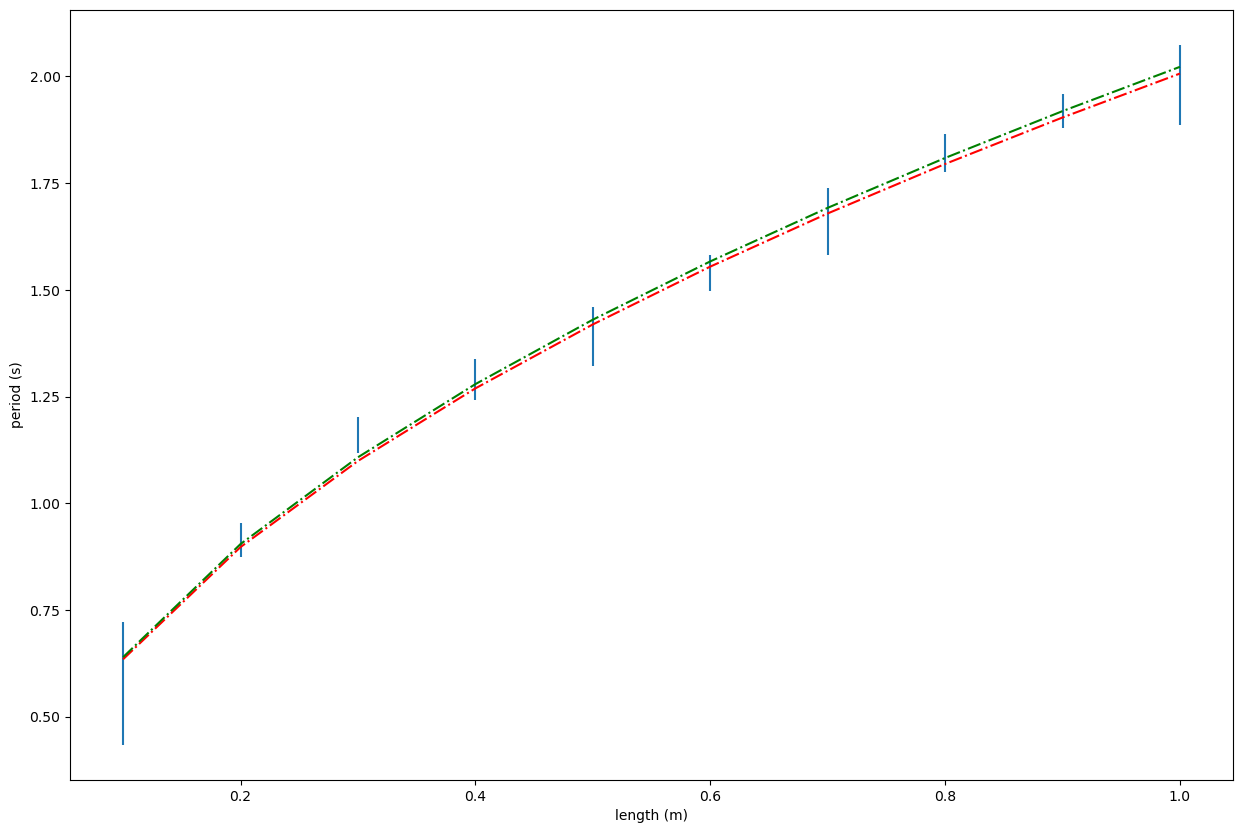

In [7]:
# And now we plot
fig, ax = plt.subplots(figsize=(15,10))

ax.errorbar(length, p_mean, yerr = 3*p_stde, linestyle='')
ax.plot(length, (coef3[0])*np.sqrt(length), linestyle="-.", label="fit1", color = 'red')
ax.plot(length, a*np.sqrt(length), linestyle="-.", label="fit2", color = 'green')
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()


In [8]:
# Define X^2 function

def chisqfunc2(b):
    model = b*np.sqrt(length)
    chisq = np.sum(((p_mean - model) / (3*p_stde))**2)
    return chisq

In [10]:
result1 =  opt.minimize(chisqfunc2, x0)

a1 = result1.x

print(a1)

[2.02239971]


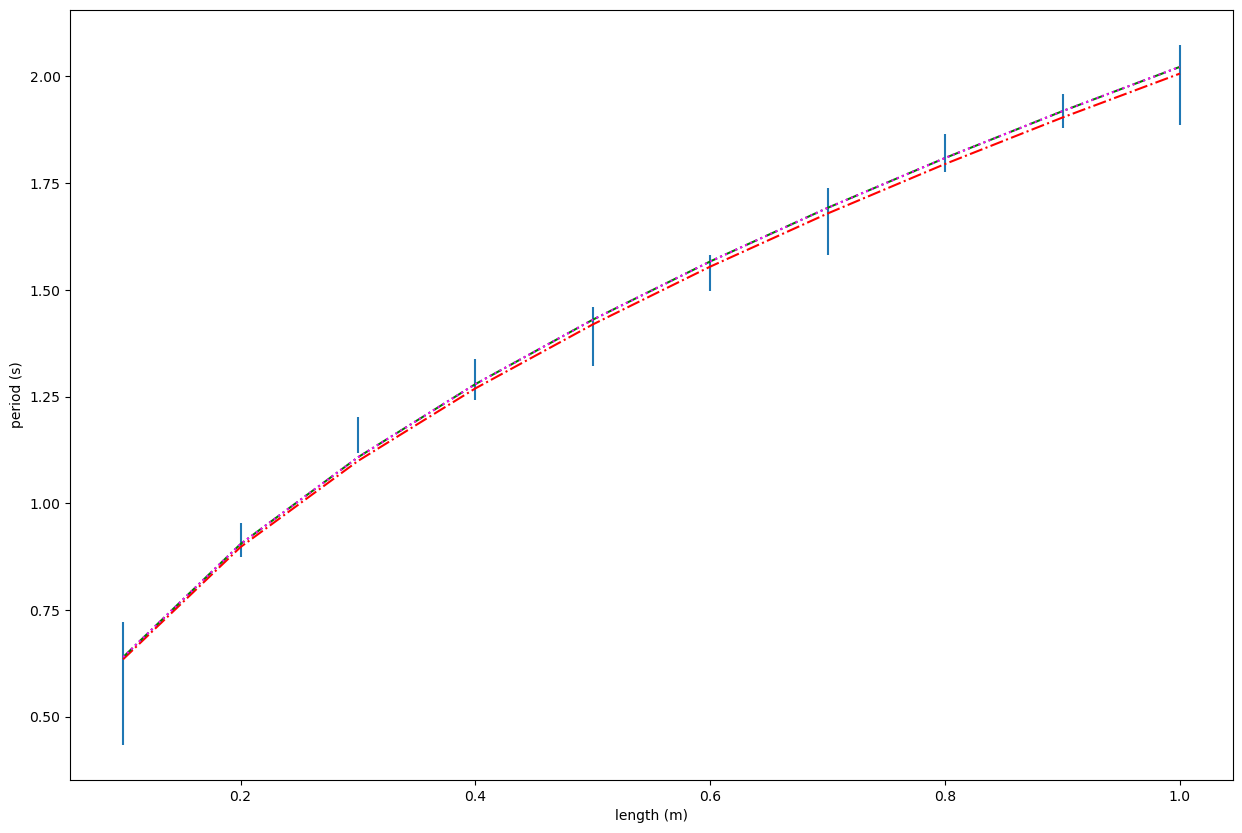

In [12]:
# And now we plot
fig, ax = plt.subplots(figsize=(15,10))

ax.errorbar(length, p_mean, yerr = 3*p_stde, linestyle='')
ax.plot(length, (coef3[0])*np.sqrt(length), linestyle="-.", label="fit1", color = 'red')
ax.plot(length, a*np.sqrt(length), linestyle="-.", label="fit2", color = 'green')
ax.plot(length, a1*np.sqrt(length), linestyle=":", label="fit2", color = 'magenta')
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()
